<center><h1>Exploratory Data Analysis</h1></center>
<hr>

### Table of Contents <a id="top"></a>
1. [Environment Setting](#1)
2. [Load Dataset](#2)
3. [Basic EDA: train.csv + test.csv](#3)
    1. [column 1: source_system_tab](#3.1)
    2. [column 2: source_type](#3.2)
    3. [column 3: source_screen_name](#3.3)
4. [Basic EDA: train.csv](#4)
    1. [column 1: source_system_tab](#4.1)
    2. [column 2: source_type](#4.2)
    3. [column 3: source_screen_name](#4.3)
5. [Process train.csv + test.csv](#5)
    1. [column 1: source_system_tab](#5.1)
    2. [column 2: source_type](#5.2)
    3. [column 3: source_screen_name](#5.3)
    4. [Save Processed Dataframe](#5.4)

<hr>

### Environment Setting <a id="1"></a>

In [1]:
# For Visualization
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

# For Dataframe Processing
import pandas as pd

In [2]:
pd.options.display.max_columns = 499
pd.options.display.max_columns = 499
pd.options.mode.chained_assignment = None

In [3]:
sns.set_style('darkgrid')

In [4]:
fname = './static/fonts/D2Coding.ttc'
font_family = fm.FontProperties(fname=fname).get_name()
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = 16

<hr>

### Load Dataset <a id="2"></a>

In [5]:
train_raw = pd.read_csv('./data/train.csv')
test_raw = pd.read_csv('./data/test.csv')
songs_raw = pd.read_csv('./data/songs.csv')
members_raw = pd.read_csv('./data/members.csv')
song_extra_info_raw = pd.read_csv('./data/song_extra_info.csv')

In [6]:
train_raw

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [7]:
test_raw

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist


In [8]:
songs_raw

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


In [9]:
members_raw

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [10]:
song_extra_info_raw

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095


<hr>

### Basic EDA: train.csv + test.csv <a id="3"></a>

1. source_system_tab: **my library** > **discover** > search > radio > listen with > explore > notification > settings
2. source_type: **local-library** > **online-playlist** > **local-playlist** > radio > album > top-hits-for-artist > song > song-based-playlist > listen-with > topic-article-playlist > artist > my-daily-playlist
3. source_screen_name: **Local playlist more** > **Online playlist more** > **Radio** > **Album more** > Search > Artist more > Discover Feature > Discover Chart > Others profile more > Discover Genre > My library > Explore > Unknown > Discover New > Search Trends > Search Home > My library_Search > Self profile more > Concert > Payment > People local > People global

In [11]:
train_test_raw = pd.concat([train_raw, test_raw], axis=0, join='inner', ignore_index=True)
train_test_raw

,msno,song_id,source_system_tab,source_screen_name,source_type
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist
...,...,...,...,...,...
9934203,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
9934204,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist
9934205,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist
9934206,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist


In [12]:
train_test_raw.describe(include='all')

,msno,song_id,source_system_tab,source_screen_name,source_type
count,9934208,9934208,9900917,9356521,9905372
unique,34403,419839,8,22,12
top,MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library
freq,7894,16019,4704222,4073317,2843745


In [13]:
train_test_raw.isna().sum()

msno                       0
song_id                    0
source_system_tab      33291
source_screen_name    577687
source_type            28836
dtype: int64

### column 1: source_system_tab <a id="3.1"></a>

In [14]:
column = 'source_system_tab'

In [15]:
train_test_raw[column].value_counts()

my library      4704222
discover        3050320
search           900901
radio            689466
listen with      310894
explore          233972
notification       8309
settings           2833
Name: source_system_tab, dtype: int64

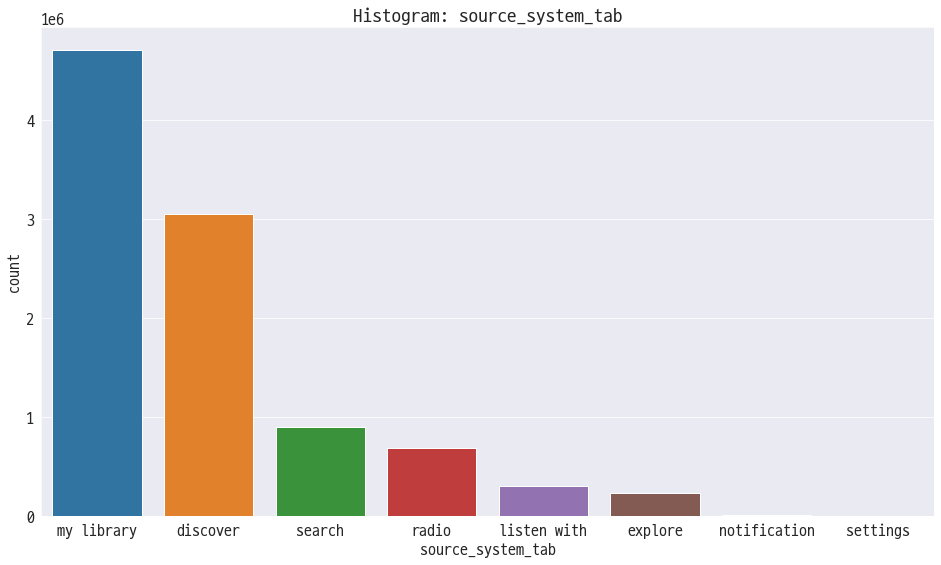

In [16]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=train_test_raw, order=train_test_raw[column].value_counts().index)
plt.title('Histogram: {}'.format(column))
plt.show()

### column 2: source_type <a id="3.2"></a>

In [17]:
column = 'source_type'

In [18]:
train_test_raw[column].value_counts()

local-library             2843745
online-playlist           2742456
local-playlist            1374040
radio                      698273
album                      672534
top-hits-for-artist        602974
song                       373875
song-based-playlist        297706
listen-with                277341
topic-article-playlist      16276
artist                       3466
my-daily-playlist            2686
Name: source_type, dtype: int64

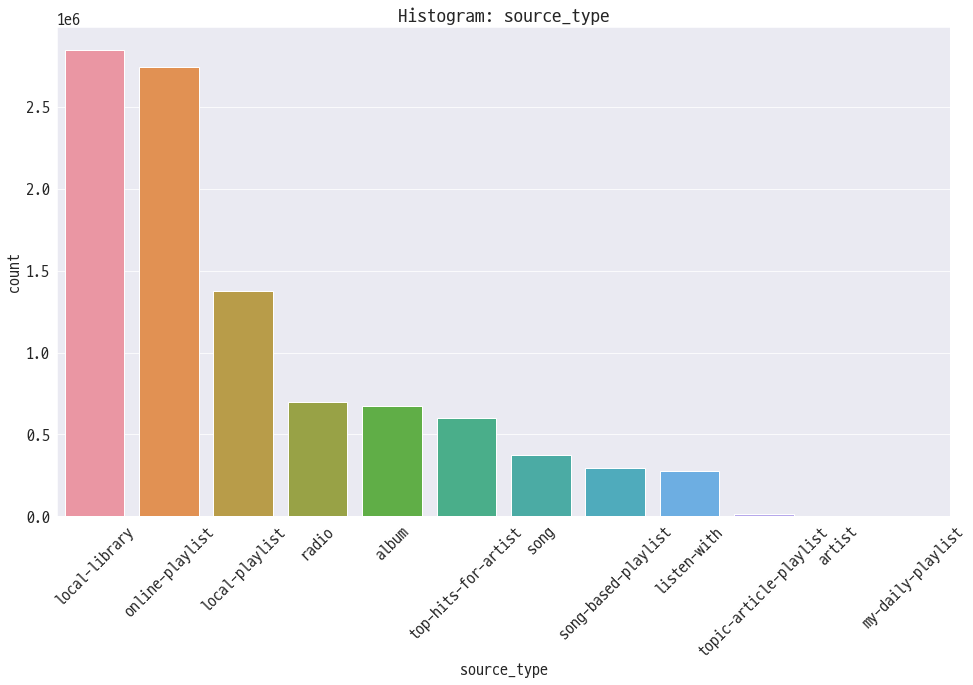

In [19]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=train_test_raw, order=train_test_raw[column].value_counts().index)
plt.title('Histogram: {}'.format(column))
plt.xticks(rotation=45)
plt.show()

### column 3: source_screen_name <a id="3.3"></a>

In [20]:
column = 'source_screen_name'

In [21]:
train_test_raw[column].value_counts()

Local playlist more     4073317
Online playlist more    1824496
Radio                    685668
Album more               596285
Search                   420469
Artist more              363428
Discover Feature         337647
Discover Chart           292657
Others profile more      292252
Discover Genre           123819
My library               101539
Explore                  100214
Unknown                   77790
Discover New              21232
Search Trends             18515
Search Home               18187
My library_Search          8565
Self profile more           343
Concert                      60
Payment                      24
People local                 13
People global                 1
Name: source_screen_name, dtype: int64

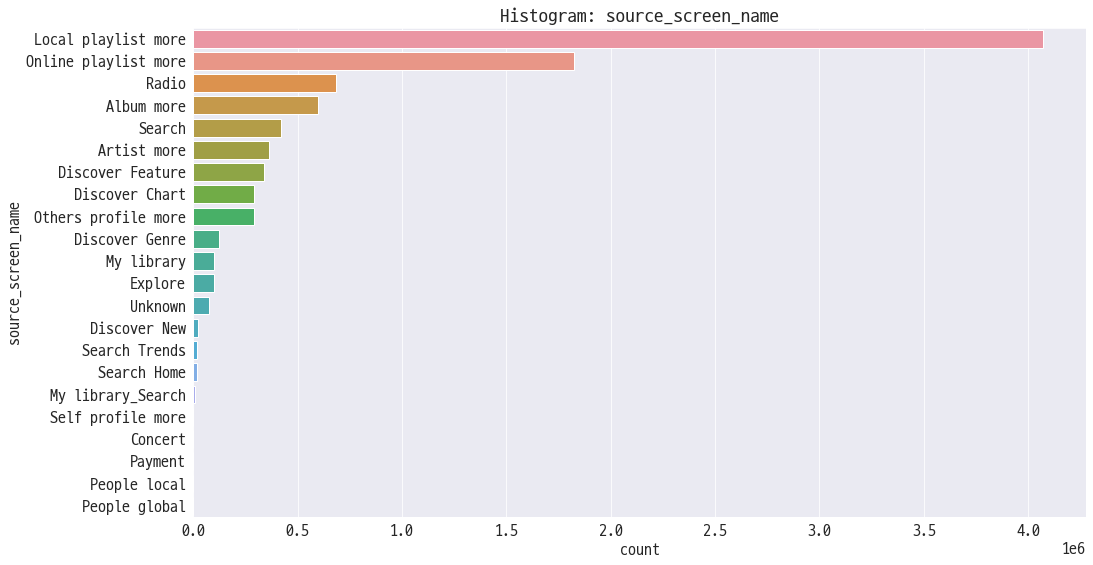

In [22]:
plt.figure(figsize=(16, 9))
sns.countplot(y=column, data=train_test_raw, order=train_test_raw[column].value_counts().index)
plt.title('Histogram: {}'.format(column))
plt.show()

<hr>

### Basic EDA: train.csv <a id="4"></a>

1. source_system_tab: **(target=1)** my library **(target=0)** discover, radio
2. source_type: **(target=1)** local-library, local-playlist **(target=0)** online-playlist, radio
3. source_screen_name: **(target=1)** Local playlist more **(target=0)** Online playlist more , Radio 

### column 1: source_system_tab <a id="4.1"><a/>

In [23]:
column = 'source_system_tab'

In [24]:
train_raw.groupby('target')[column].value_counts()

target  source_system_tab
0       my library           1401454
        discover             1273185
        radio                 370558
        search                360657
        listen with           142944
        explore                97050
        notification            3847
        settings                 900
1       my library           2283276
        discover              906067
        search                262629
        radio                 106143
        explore                70899
        listen with            69322
        notification            2338
        settings                1300
Name: source_system_tab, dtype: int64

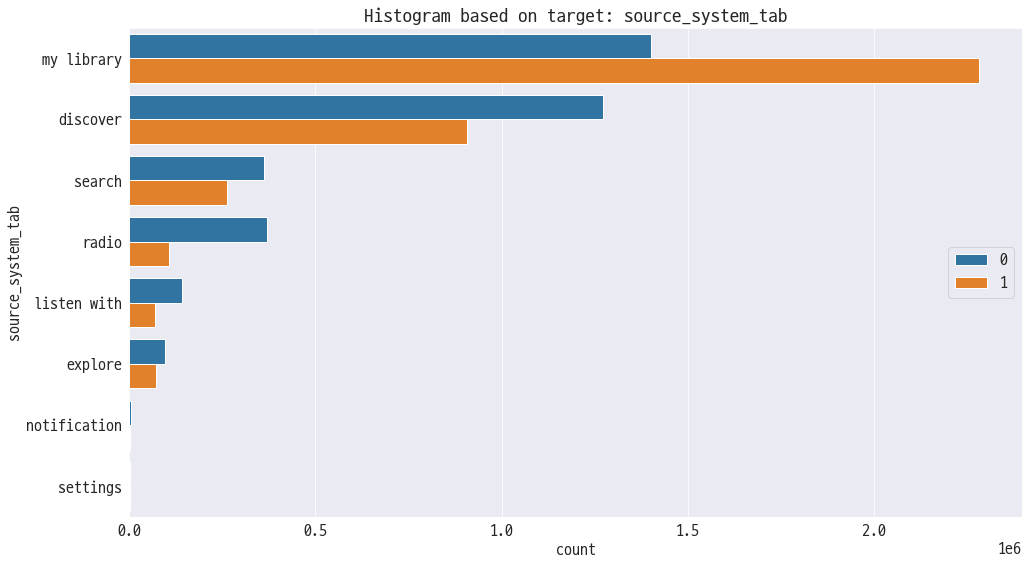

In [25]:
plt.figure(figsize=(16, 9))
sns.countplot(y=column, data=train_raw, order=train_raw[column].value_counts().index, hue='target')
plt.title('Histogram based on target: {}'.format(column))
plt.legend(loc='center right')
plt.show()

### column 2: source_type <a id="4.2"></a>

In [26]:
column = 'source_type'

In [27]:
train_raw.groupby('target')[column].value_counts()

target  source_type           
0       online-playlist           1131585
        local-library              831973
        radio                      376953
        local-playlist             369493
        album                      289547
        top-hits-for-artist        246316
        song                       137666
        listen-with                131200
        song-based-playlist        130430
        topic-article-playlist       5661
        artist                       1298
        my-daily-playlist             414
1       local-library             1429426
        online-playlist            836339
        local-playlist             710010
        album                      187797
        top-hits-for-artist        177298
        song                       107056
        radio                      106156
        song-based-playlist         80097
        listen-with                 61642
        topic-article-playlist       5533
        artist                       1740
   

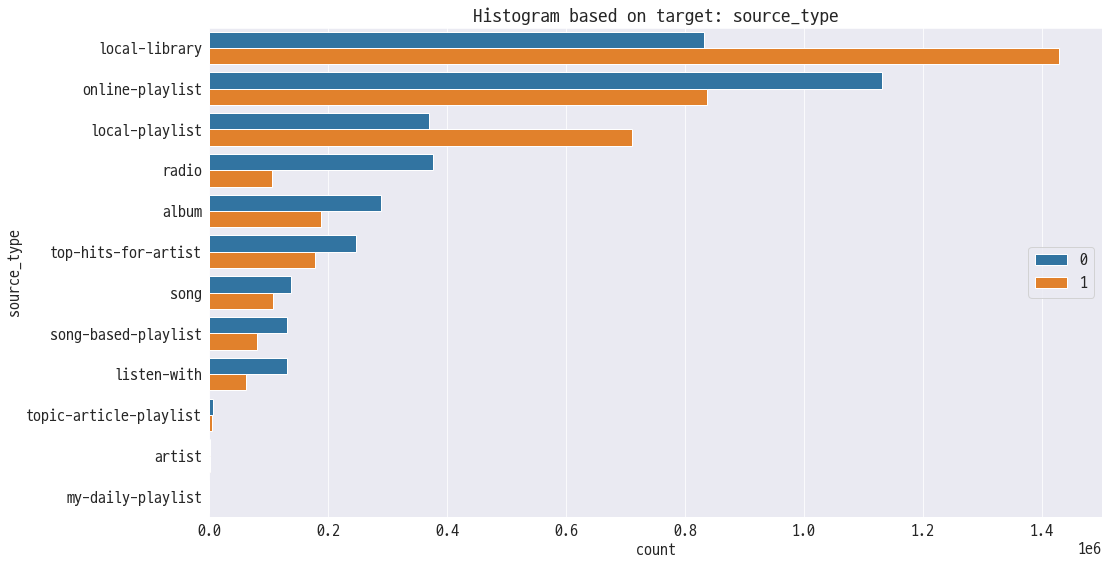

In [28]:
plt.figure(figsize=(16, 9))
sns.countplot(y=column, data=train_raw, order=train_raw[column].value_counts().index, hue='target')
plt.title('Histogram based on target: {}'.format(column))
plt.legend(loc='center right')
plt.show()

### column 3: source_screen_name <a id="4.3"></a>

In [29]:
column = 'source_screen_name'

In [30]:
train_raw.groupby('target')[column].value_counts()

target  source_screen_name  
0       Local playlist more     1171891
        Online playlist more     757472
        Radio                    371386
        Album more               256063
        Search                   157676
        Discover Feature         155315
        Artist more              147202
        Others profile more      138708
        Discover Chart           103190
        Discover Genre            53605
        Explore                   39922
        Unknown                   35798
        My library                26048
        Search Home                8715
        Discover New               8687
        Search Trends              8493
        My library_Search          2508
        Self profile more           122
        Concert                      23
        Payment                       4
1       Local playlist more     2056311
        Online playlist more     537217
        Album more               164093
        Search                   140811
        Dis

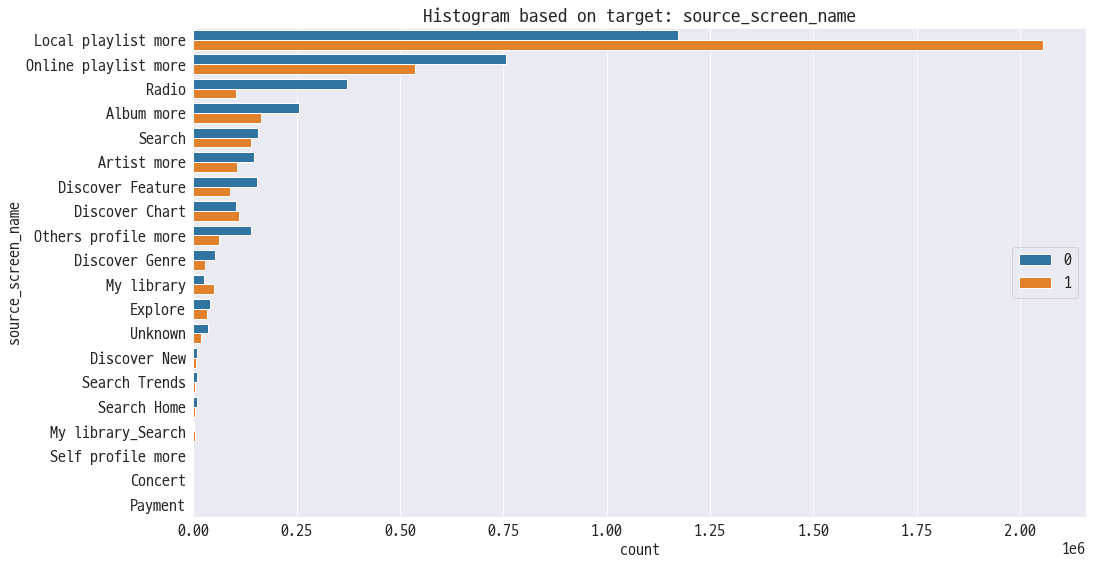

In [31]:
plt.figure(figsize=(16, 9))
sns.countplot(y=column, data=train_raw, order=train_raw[column].value_counts().index, hue='target')
plt.legend(loc='center right')
plt.title('Histogram based on target: {}'.format(column))
plt.show()

<hr>

### Process train.csv + test.csv <a id="5"></a>

1. source_system_tab: 0: else | 1: my library | 2: discover | 3: radio
2. source_type: 0: else | 1: local-library | 2: local-playlist | 3: online-playlist | 4: radio
3. source_screen_name: 0: else | 1: Local playlist more | 2: Online playlist more | 3: Radio 

In [32]:
train_proc = train_raw.copy()
test_proc = test_raw.copy()

### column 1: source_system_tab <a id="5.1"></a>

In [33]:
source_system_tab_list = ['my library', 'discover', 'radio']

In [34]:
column = 'source_system_tab'

In [35]:
train_proc.loc[~train_proc[column].isin(source_system_tab_list), column] = 'REMOVED'
train_proc[column].value_counts()

my library    3684730
discover      2179252
REMOVED       1036735
radio          476701
Name: source_system_tab, dtype: int64

In [36]:
test_proc.loc[~test_proc[column].isin(source_system_tab_list), column] = 'REMOVED'
test_proc[column].value_counts()

my library    1019492
discover       871068
REMOVED        453465
radio          212765
Name: source_system_tab, dtype: int64

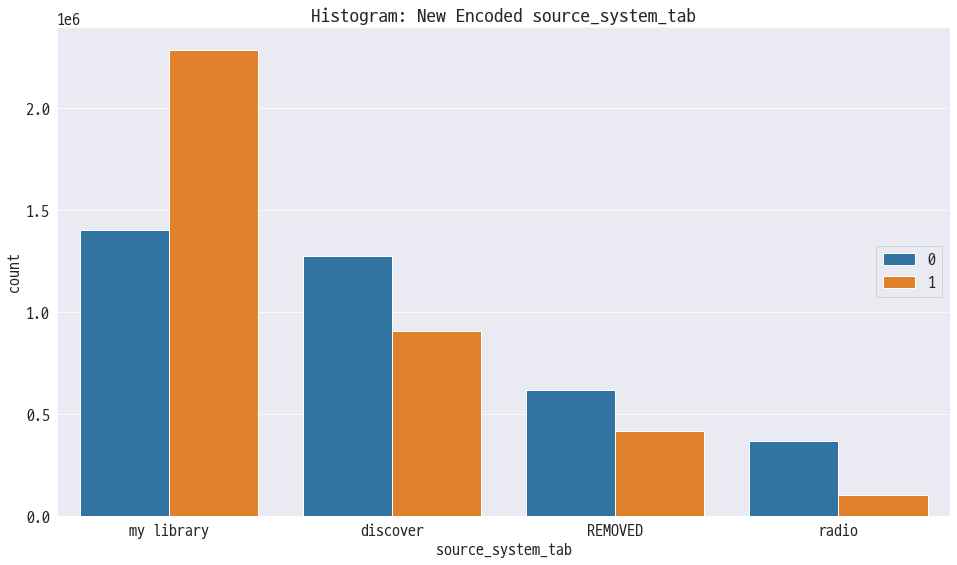

In [37]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=train_proc, order=train_proc[column].value_counts().index, hue='target')
plt.title('Histogram: New Encoded {}'.format(column))
plt.legend(loc='center right')
plt.show()

### column 2: source_type <a id="5.2"></a>

In [38]:
source_type_list = ['local-library', 'local-playlist', 'online-playlist', 'radio']

In [39]:
column = 'source_type'

In [40]:
train_proc.loc[~train_proc[column].isin(source_type_list), column] = 'REMOVED'
train_proc[column].value_counts()

local-library      2261399
online-playlist    1967924
REMOVED            1585483
local-playlist     1079503
radio               483109
Name: source_type, dtype: int64

In [41]:
test_proc.loc[~test_proc[column].isin(source_type_list), column] = 'REMOVED'
test_proc[column].value_counts()

online-playlist    774532
REMOVED            690211
local-library      582346
local-playlist     294537
radio              215164
Name: source_type, dtype: int64

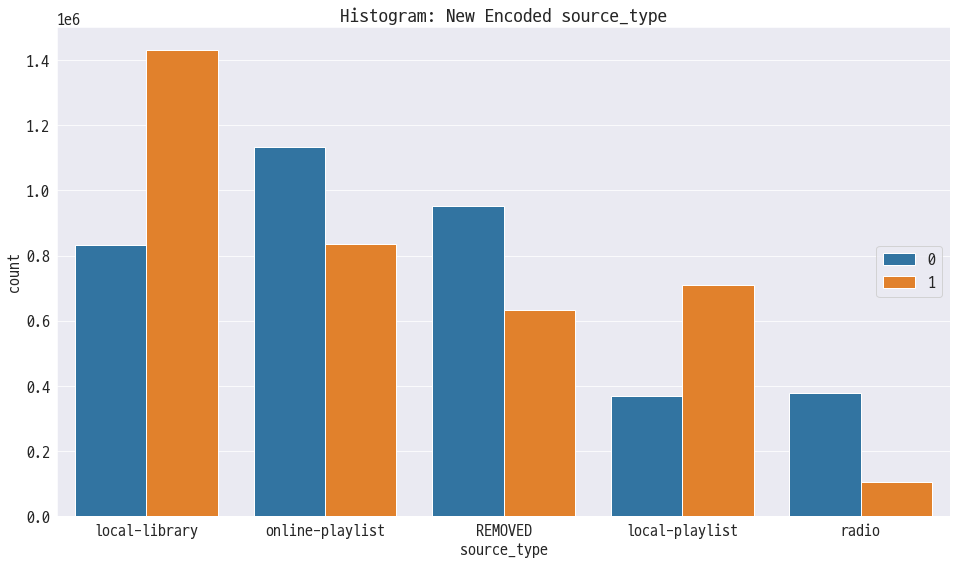

In [42]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=train_proc, order=train_proc[column].value_counts().index, hue='target')
plt.title('Histogram: New Encoded {}'.format(column))
plt.legend(loc='center right')
plt.show()

### column 3: source_screen_name <a id="5.3"></a>

In [43]:
source_screen_name_list = ['Local playlist more', 'Online playlist more', 'Radio']

In [44]:
column = 'source_screen_name'

In [45]:
train_proc.loc[~train_proc[column].isin(source_screen_name_list), column] = 'REMOVED'
train_proc[column].value_counts()

Local playlist more     3228202
REMOVED                 2380060
Online playlist more    1294689
Radio                    474467
Name: source_screen_name, dtype: int64

In [46]:
test_proc.loc[~test_proc[column].isin(source_screen_name_list), column] = 'REMOVED'
test_proc[column].value_counts()

REMOVED                 970667
Local playlist more     845115
Online playlist more    529807
Radio                   211201
Name: source_screen_name, dtype: int64

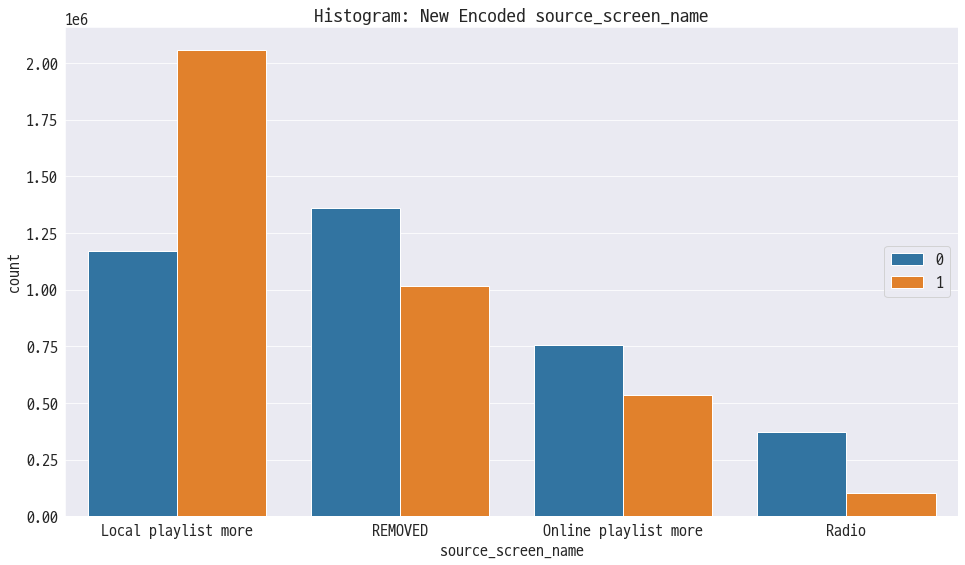

In [47]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=train_proc, order=train_proc[column].value_counts().index, hue='target')
plt.title('Histogram: New Encoded {}'.format(column))
plt.legend(loc='center right')
plt.show()

### Save Processed Dataframe <a id="5.4"></a>

In [48]:
train_proc.to_csv('./data/processed/train.csv', index=False)
test_proc.to_csv('./data/processed/test.csv', index=False)